In [11]:
import subprocess
import re
import matplotlib.pyplot as plt
import numpy as np
import math
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata

In [12]:
def run_executable(executable_path, args):
    command = [executable_path] + args

    try:
        result = subprocess.run(command, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
        
        if result.returncode != 0:
            print(f"Error running the executable: {result.stderr}")
            return None
        
        output = result.stdout
        return output
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

In [16]:
def find_from_output(raw_string, output):
    if output is None:
        return None
    
    match = re.search(raw_string, output)
    
    if match:
        miss_rate = match.group(1)
        return float(miss_rate)
    else:
        print("Could not find the miss rate in the output.")
        return None

In [17]:
executable = './temp1'
sizes = [i for i in range(11, 21)]
associativities = [1,2,4,8,"FA"]

Error running the executable: temp1: cache_sim.cc:272: void Cache::call_cacti(): Assertion `(name == "VC") || (error_code == 0)' failed.

Error running the executable: temp1: cache_sim.cc:272: void Cache::call_cacti(): Assertion `(name == "VC") || (error_code == 0)' failed.

Error running the executable: temp1: cache_sim.cc:272: void Cache::call_cacti(): Assertion `(name == "VC") || (error_code == 0)' failed.

[[0.1477, 0.1002, 0.067, 0.0461, 0.0377, 0.0329, 0.0323, 0.0258, 0.0258, 0.0258], [0.1071, 0.0753, 0.0473, 0.0338, 0.0288, 0.0271, 0.0259, 0.0258, 0.0258, 0.0258], [None, 0.0599, 0.0425, 0.0283, 0.0264, 0.026, 0.0258, 0.0258, 0.0258, 0.0258], [None, None, 0.0395, 0.0277, 0.0262, 0.0259, 0.0258, 0.0258, 0.0258, 0.0258], [0.0886, 0.0495, 0.0391, 0.0263, 0.0262, 0.0258, 0.0258, 0.0258, 0.0258, 0.0258]]
2  KB: ( 0.059 , 0.019 , NA, NA, 0.0)
4  KB: ( 0.051 , 0.026 , 0.01 , NA, 0.0)
8  KB: ( 0.028 , 0.008 , 0.003 , 0.0 , 0.0)
16  KB: ( 0.02 , 0.007 , 0.002 , 0.001 , 0.0)
32  KB: ( 0.01

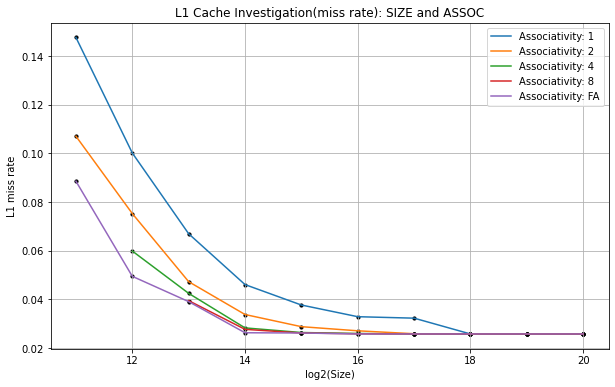

In [30]:

plot_L1missrate_size = [[0 for _ in range(10)] for _ in range(5)]
x = sizes

for i in range(10):
    for j in range(5):
        size = x[i]
        associativity = associativities[j]
        if associativity == "FA":
            associativity = pow(2,size)//32
        args = [str(pow(2,size)), str(associativity), str(32), str(0), str(0), str(0), "gcc_trace.txt"]
        output = run_executable(executable, args)
        plot_L1missrate_size[j][i] = find_from_output(r'combined L1\+VC miss rate:\s*([0-9]*\.?[0-9]+)', output)
print(plot_L1missrate_size)

plt.figure(figsize=(10, 6))

for j in range(len(sizes)):
    print(pow(2,sizes[j]-10), ' KB: ( ', end='')
    for i in range(len(associativities)-1):
        if(plot_L1missrate_size[i][j] == None):
            print('NA, ', end='')
        else:
            print(round(plot_L1missrate_size[i][j]-plot_L1missrate_size[4][j],3), ', ', end='')
    print('0.0)')
    
for i in range(len(associativities)):
    # if(plot_L1missrate_size[i] == None):
    #     continue
    plt.plot(x, plot_L1missrate_size[i], label=f'Associativity: {associativities[i]}')  # Plot each curve with a label
    plt.scatter(x, plot_L1missrate_size[i], color='black', s=10)

plt.title('L1 Cache Investigation(miss rate): SIZE and ASSOC')
plt.xlabel('log2(Size)')
plt.ylabel('L1 miss rate')
plt.legend()  
plt.grid()   
plt.show() 

Error running the executable: temp1: cache_sim.cc:272: void Cache::call_cacti(): Assertion `(name == "VC") || (error_code == 0)' failed.

Error running the executable: temp1: cache_sim.cc:272: void Cache::call_cacti(): Assertion `(name == "VC") || (error_code == 0)' failed.

Error running the executable: temp1: cache_sim.cc:272: void Cache::call_cacti(): Assertion `(name == "VC") || (error_code == 0)' failed.

[[3.3955, 2.3674, 1.6576, 1.2246, 1.0744, 1.0232, 1.0765, 1.0113, 1.1233, 1.2559], [2.5391, 1.8457, 1.254, 0.9782, 0.909, 0.9088, 0.94, 1.0115, 1.1325, 1.2679], [None, 1.5252, 1.1509, 0.8663, 0.8624, 0.8921, 0.9468, 1.016, 1.1385, 1.262], [None, None, 1.1124, 0.8621, 0.8659, 0.9034, 0.9665, 1.0214, 1.1447, 1.2703], [2.1252, 1.2722, 1.0539, 0.7842, 0.825, 0.8382, 0.8729, 0.9611, 1.0373, 1.1527]]


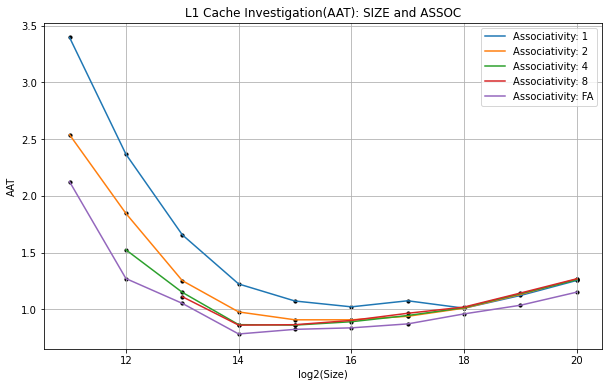

In [19]:
plot_AAT_size = [[0 for _ in range(10)] for _ in range(5)]
x = sizes

for i in range(10):
    for j in range(5):
        size = x[i]
        associativity = associativities[j]
        if associativity == "FA":
            associativity = pow(2,size)//32
        args = [str(pow(2,size)), str(associativity), str(32), str(0), str(0), str(0), "gcc_trace.txt"]
        output = run_executable(executable, args)
        plot_AAT_size[j][i] = find_from_output(r'average access time:\s*([0-9]*\.?[0-9]+)', output)

print(plot_AAT_size)
plt.figure(figsize=(10, 6))

for i in range(len(associativities)):
    plt.plot(x, plot_AAT_size[i], label=f'Associativity: {associativities[i]}')  # Plot each curve with a label
    plt.scatter(x, plot_AAT_size[i], color='black', s=10)

plt.title('L1 Cache Investigation(AAT): SIZE and ASSOC')
plt.xlabel('log2(Size)')
plt.ylabel('AAT')
plt.legend()  
plt.grid()   
plt.show() 

Error running the executable: temp1: cache_sim.cc:272: void Cache::call_cacti(): Assertion `(name == "VC") || (error_code == 0)' failed.

Error running the executable: temp1: cache_sim.cc:272: void Cache::call_cacti(): Assertion `(name == "VC") || (error_code == 0)' failed.

Error running the executable: temp1: cache_sim.cc:272: void Cache::call_cacti(): Assertion `(name == "VC") || (error_code == 0)' failed.

[[0.7802, 0.7771, 0.782, 0.7996, 0.8306, 0.8819, 0.948], [0.7986, 0.7918, 0.8021, 0.8171, 0.8562, 0.8923, 0.95], [None, 0.8021, 0.8039, 0.8242, 0.8616, 0.901, 0.9585], [None, None, 0.8285, 0.8324, 0.8683, 0.9136, 0.9782], [0.7842, 0.7728, 0.779, 0.7847, 0.8276, 0.8497, 0.8846]]


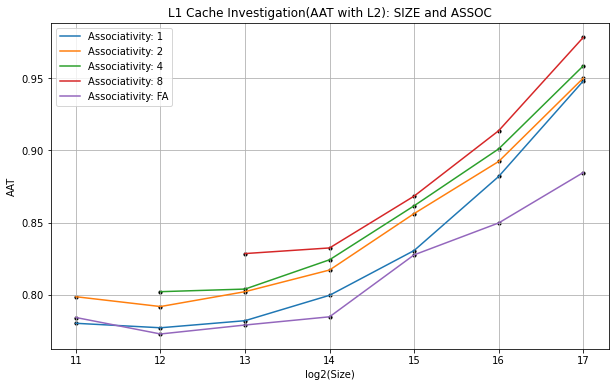

In [21]:
plot_AAT_size_L2 = [[0 for _ in range(7)] for _ in range(5)]
x = [i for i in sizes[:7]]

for i in range(7):
    for j in range(5):
        size = x[i]
        associativity = associativities[j]
        if associativity == "FA":
            associativity = pow(2,size)//32
        args = [str(pow(2,size)), str(associativity), str(32), str(0), str(262144), str(8), "gcc_trace.txt"]
        output = run_executable(executable, args)
        plot_AAT_size_L2[j][i] = find_from_output(r'average access time:\s*([0-9]*\.?[0-9]+)', output)

print(plot_AAT_size_L2)
plt.figure(figsize=(10, 6))

for i in range(len(associativities)):
    plt.plot(x, plot_AAT_size_L2[i], label=f'Associativity: {associativities[i]}')  # Plot each curve with a label
    plt.scatter(x, plot_AAT_size_L2[i], color='black', s=10)

plt.title('L1 Cache Investigation(AAT with L2): SIZE and ASSOC')
plt.xlabel('log2(Size)')
plt.ylabel('AAT')
plt.legend()  
plt.grid()   
plt.show() 

[[0.1473, 0.1427, 0.1584, 0.2036], [0.1062, 0.0962, 0.1033, 0.1334], [0.0755, 0.0599, 0.0619, 0.083], [0.0595, 0.0425, 0.0386, 0.0483], [0.0482, 0.0283, 0.0204, 0.0198], [0.0475, 0.0264, 0.0156, 0.0111]]


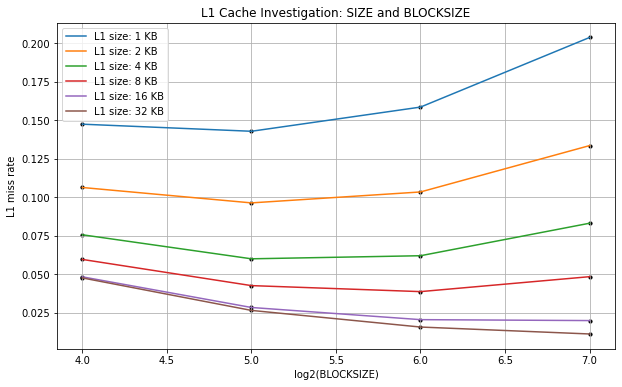

In [8]:
plot_L1missrate_blocksize = [[0 for _ in range(4)] for _ in range(6)]
block_sizes = [16, 32, 64, 128]
# x = block_sizes
x = [math.log2(i) for i in block_sizes]

for i in range(4):
    for j in range(6):
        block_size = block_sizes[i]
        size = sizes[j]-1
        args = [str(pow(2,size)), str(4), str(block_size), str(0), str(0), str(0), "gcc_trace.txt"]
        output = run_executable(executable, args)
        plot_L1missrate_blocksize[j][i] = find_from_output(r'combined L1\+VC miss rate:\s*([0-9]*\.?[0-9]+)', output)

print(plot_L1missrate_blocksize)
plt.figure(figsize=(10, 6))

for i in range(6):
    plt.plot(x, plot_L1missrate_blocksize[i], label=f'L1 size: {pow(2,sizes[i]-11)} KB')  # Plot each curve with a label
    plt.scatter(x, plot_L1missrate_blocksize[i], color='black', s=10)

plt.title('L1 Cache Investigation: SIZE and BLOCKSIZE')
plt.xlabel('log2(BLOCKSIZE)')
plt.ylabel('L1 miss rate')
plt.legend()  
plt.grid()   
plt.show() 

[10 11 12 13 14 15 16] [15 16 17 18 19 20]
Error running the executable: temp1: cache_sim.cc:272: void Cache::call_cacti(): Assertion `(name == "VC") || (error_code == 0)' failed.

Error running the executable: temp1: cache_sim.cc:272: void Cache::call_cacti(): Assertion `(name == "VC") || (error_code == 0)' failed.

Error running the executable: temp1: cache_sim.cc:272: void Cache::call_cacti(): Assertion `(name == "VC") || (error_code == 0)' failed.

Error running the executable: temp1: cache_sim.cc:272: void Cache::call_cacti(): Assertion `(name == "VC") || (error_code == 0)' failed.

Error running the executable: temp1: cache_sim.cc:272: void Cache::call_cacti(): Assertion `(name == "VC") || (error_code == 0)' failed.

Error running the executable: temp1: cache_sim.cc:272: void Cache::call_cacti(): Assertion `(name == "VC") || (error_code == 0)' failed.

Error running the executable: temp1: cache_sim.cc:272: void Cache::call_cacti(): Assertion `(name == "VC") || (error_code == 0)' 

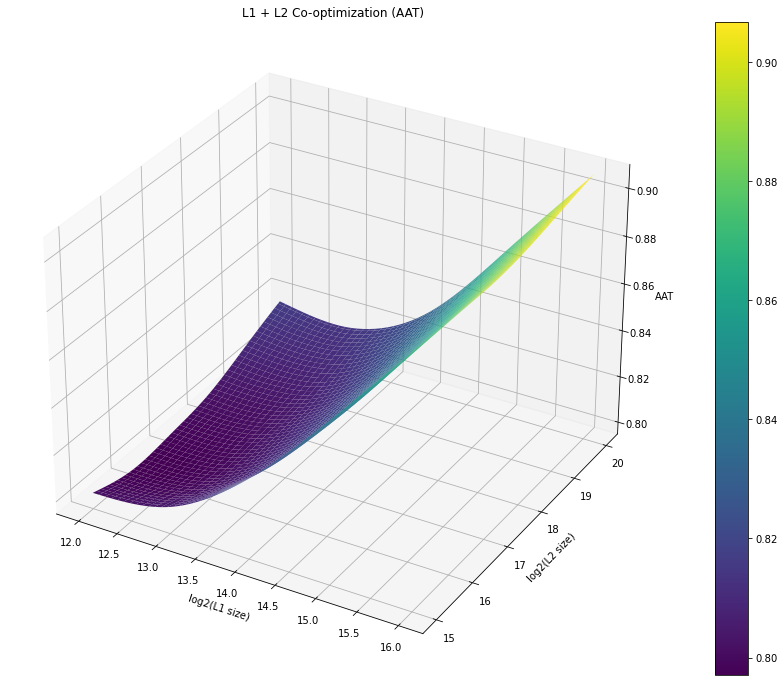

In [22]:
x5 = np.array([i-1 for i in sizes[:7]])
y5 = np.array(sizes[4:])
print(x5, y5)

pairs = np.array(np.meshgrid(x5,y5)).T.reshape(-1, 2)

filtered_pairs = pairs[pairs[:, 0] < pairs[:, 1]]

x5 = filtered_pairs[:, 0]
y5 = filtered_pairs[:, 1]
z5 = [0 for i in range(len(x5))]

min1 = 1
ind = 0

for i in range(len(x5)):
    args = [str(pow(2,x5[i])), str(4), str(32), str(0), str(pow(2,y5[i])), str(8), "gcc_trace.txt"]
    output = run_executable(executable, args)
    z5[i] = find_from_output(r'average access time:\s*([0-9]*\.?[0-9]+)', output)
    if z5[i] == None:
        continue
    if z5[i] < min1:
        min1 = z5[i]
        ind = i

print(x5[ind], y5[ind], min1)

z5 = np.array(z5)
print(z5)
x5 = x5[12:]
y5 = y5[12:]
z5 = z5[12:]

xi = np.linspace(min(x5), max(x5), 100)   # Create grid points for x
yi = np.linspace(min(y5), max(y5), 100)   # Create grid points for y
X, Y = np.meshgrid(xi, yi)

Z = griddata((x5, y5), z5, (X, Y), method='cubic')

fig = plt.figure(figsize=(20, 12))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')

ax.set_xlabel('log2(L1 size)')
ax.set_ylabel('log2(L2 size)')
ax.set_zlabel('AAT')
ax.set_title('L1 + L2 Co-optimization (AAT)')

fig.colorbar(surf)

plt.show()


In [10]:
x5 = np.array([i-1 for i in sizes[:7]])
y5 = np.array(sizes[4:])

pairs = np.array(np.meshgrid(x5,y5)).T.reshape(-1, 2)

filtered_pairs = pairs[pairs[:, 0] < pairs[:, 1]]

x5 = filtered_pairs[:, 0]
y5 = filtered_pairs[:, 1]
z5 = [0 for i in range(len(x5))]

min1 = 1e9
ind = 0

for i in range(len(x5)):
    args = [str(pow(2,x5[i])), str(4), str(32), str(0), str(pow(2,y5[i])), str(8), "gcc_trace.txt"]
    output = run_executable(executable, args)
    z5[i] = find_from_output(r'energy-delay product:\s*([0-9]*\.?[0-9]+)', output)
    if z5[i] == None:
        continue
    if z5[i] < min1:
        min1 = z5[i]
        ind = i

print(x5[ind], y5[ind], min1)
x5 = x5[12:]
y5 = y5[12:]
z5 = z5[12:]

z5 = np.array(z5)
print(z5)

xi = np.linspace(min(x5), max(x5), 100)   # Create grid points for x
yi = np.linspace(min(y5), max(y5), 100)   # Create grid points for y
X, Y = np.meshgrid(xi, yi)

Z = griddata((x5, y5), z5, (X, Y), method='cubic')

fig = plt.figure(figsize=(20, 12))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')

ax.set_xlabel('log2(L1 size)')
ax.set_ylabel('log2(L2 size)')
ax.set_zlabel('EDP')
ax.set_title('L1 + L2 Co-optimization (EDP)')

fig.colorbar(surf)

plt.show()


KeyboardInterrupt: 

[10, 11, 12, 13, 14, 15]
Error running the executable: temp1: cache_sim.cc:272: void Cache::call_cacti(): Assertion `(name == "VC") || (error_code == 0)' failed.

Error running the executable: temp1: cache_sim.cc:272: void Cache::call_cacti(): Assertion `(name == "VC") || (error_code == 0)' failed.

Error running the executable: temp1: cache_sim.cc:272: void Cache::call_cacti(): Assertion `(name == "VC") || (error_code == 0)' failed.

[[0.7861, 0.7802, 0.7771, 0.782, 0.7996, 0.8306], [0.7905, 0.7839, 0.7824, 0.7857, 0.8022, 0.832], [0.7845, 0.78, 0.7799, 0.7838, 0.8014, 0.8317], [0.7769, 0.7751, 0.7752, 0.7811, 0.8007, 0.8313], [None, 0.7986, 0.7918, 0.8021, 0.8171, 0.8562], [None, None, 0.8021, 0.8039, 0.8242, 0.8616]]


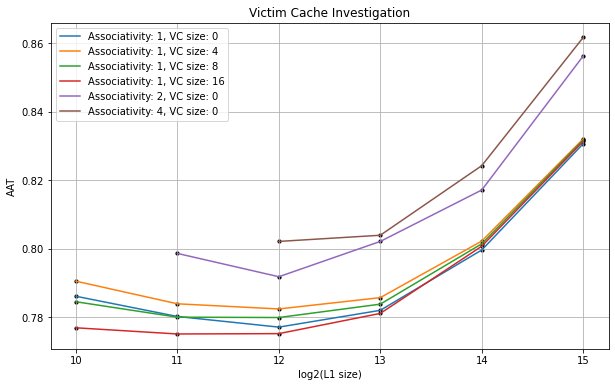

In [23]:
associativities1 = [1,1,1,1,2,4]
vcs = [0,4,8,16,0,0]
x7 = [i-1 for i in sizes[:6]]
y7 = [[0 for _ in range(6)] for _ in range(6)]

for i in range(6):
    for j in range(6):
        size = x7[i]
        associativity = associativities1[j]
        if associativity == "FA":
            associativity = pow(2,size)//32
        args = [str(pow(2,size)), str(associativity), str(32), str(vcs[j]), str(262144), str(8), "gcc_trace.txt"]
        output = run_executable(executable, args)
        y7[j][i] = find_from_output(r'average access time:\s*([0-9]*\.?[0-9]+)', output)

print(y7)
plt.figure(figsize=(10, 6))
for i in range(len(associativities1)):
    plt.plot(x7, y7[i], label=f'Associativity: {associativities1[i]}, VC size: {vcs[i]}')  # Plot each curve with a label
    plt.scatter(x7, y7[i], color='black', s=10)

plt.title('Victim Cache Investigation')
plt.xlabel('log2(L1 size)')
plt.ylabel('AAT')
plt.legend()  
plt.grid()   
plt.show() 